In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
df = pd.read_csv('FlowStatsfile.csv')
df.head()


,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.733949e+09,1,10.0.0.1505010.0.0.10352766,10.0.0.1,5050,10.0.0.10,35276,6,-1,-1,...,20,100,0,86620,5717200,21655.00,1.342946e-04,1.429300e+06,8.863876e-03,0
1,1.733949e+09,1,10.0.0.103527610.0.0.150506,10.0.0.10,35276,10.0.0.1,5050,6,-1,-1,...,20,100,0,204041,9207708274,51010.25,3.153648e-04,2.301927e+09,1.423139e+01,0
2,1.733949e+09,3,10.0.0.1505010.0.0.10352766,10.0.0.1,5050,10.0.0.10,35276,6,-1,-1,...,20,100,0,86620,5717200,21655.00,1.359812e-04,1.429300e+06,8.975196e-03,0
3,1.733949e+09,3,10.0.0.103527610.0.0.150506,10.0.0.10,35276,10.0.0.1,5050,6,-1,-1,...,20,100,0,204041,9207773434,51010.25,3.129463e-04,2.301943e+09,1.412235e+01,0
4,1.733949e+09,3,10.0.0.103527610.0.0.550501,10.0.0.10,35276,10.0.0.5,5050,1,0,8,...,20,100,0,5,466,1.25,7.633588e-09,1.165000e+02,7.114504e-07,0


In [5]:
df.columns

Index(['timestamp', 'datapath_id', 'flow_id', 'ip_src', 'tp_src', 'ip_dst',
       'tp_dst', 'ip_proto', 'icmp_code', 'icmp_type', 'flow_duration_sec',
       'flow_duration_nsec', 'idle_timeout', 'hard_timeout', 'flags',
       'packet_count', 'byte_count', 'packet_count_per_second',
       'packet_count_per_nsecond', 'byte_count_per_second',
       'byte_count_per_nsecond', 'label'],
      dtype='object')

In [18]:
#df.info()
df.describe()
#df.isnull().sum()


,timestamp,datapath_id,tp_src,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
count,3.104750e+05,310475.000000,310475.000000,310475.000000,310475.000000,310475.000000,310475.000000,310475.000000,3.104750e+05,310475.0,310475.0,310475.0,310475.000000,3.104750e+05,310475.000000,310475.000000,3.104750e+05,310475.000000,310475.000000
mean,1.733953e+09,3.087730,13478.905171,815.063429,7.862942,-0.422643,3.997939,8.841182,4.875869e+08,20.0,100.0,0.0,2121.362741,5.965695e+07,174.218323,0.000014,4.919027e+06,0.426218,0.953993
std,6.285412e+02,1.556781,15663.845644,5914.314105,7.862173,0.519271,4.453029,8.835073,2.859152e+08,0.0,0.0,0.0,28486.447855,1.095675e+09,2414.986110,0.001216,9.319254e+07,52.755413,0.209500
min,1.733949e+09,1.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000e+00,20.0,100.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.733953e+09,2.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,3.000000,2.400000e+08,20.0,100.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,1.733953e+09,3.000000,0.000000,0.000000,1.000000,0.000000,8.000000,7.000000,4.790000e+08,20.0,100.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,1.733953e+09,4.000000,28855.000000,0.000000,17.000000,0.000000,8.000000,13.000000,7.320000e+08,20.0,100.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,1.733953e+09,6.000000,60942.000000,60942.000000,17.000000,3.000000,8.000000,100.000000,9.990000e+08,20.0,100.0,0.0,612486.000000,2.740380e+10,71505.500000,0.445185,3.182608e+09,19728.326482,1.000000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Filter numerical columns and exclude 'timestamp'
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('timestamp', errors='ignore')  # Exclude 'timestamp' safely
df_numerical = df[numerical_columns]

# Step 2: Split features and labels
X = df_numerical.drop('label', axis=1)
y = df_numerical['label']

# Step 3: Create a balanced subset
df_0 = df[df['label'] == 0].sample(14284, random_state=42)  # Downsample
df_1 = df[df['label'] == 1].sample(15000, random_state=42)  # Subsample
df_balanced = pd.concat([df_0, df_1])

X_balanced = df_balanced[numerical_columns].drop('label', axis=1)
y_balanced = df_balanced['label']

# Step 4: Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train models
clf_balanced = RandomForestClassifier(random_state=42)
clf_imbalanced = RandomForestClassifier(random_state=42)

clf_balanced.fit(X_train_balanced, y_train_balanced)
clf_imbalanced.fit(X_train_full, y_train_full)

# Step 6: Evaluate models
y_pred_balanced = clf_balanced.predict(X_test_balanced)
y_pred_imbalanced = clf_imbalanced.predict(X_test_full)

# Balanced Results
print("Balanced Data:")
print("Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced))
print(classification_report(y_test_balanced, y_pred_balanced))

# Imbalanced Results
print("Imbalanced Data:")
print("Accuracy:", accuracy_score(y_test_full, y_pred_imbalanced))
print(classification_report(y_test_full, y_pred_imbalanced))


Balanced Data:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2856
           1       1.00      1.00      1.00      3001

    accuracy                           1.00      5857
   macro avg       1.00      1.00      1.00      5857
weighted avg       1.00      1.00      1.00      5857

Imbalanced Data:
Accuracy: 0.999951686931315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2831
           1       1.00      1.00      1.00     59264

    accuracy                           1.00     62095
   macro avg       1.00      1.00      1.00     62095
weighted avg       1.00      1.00      1.00     62095



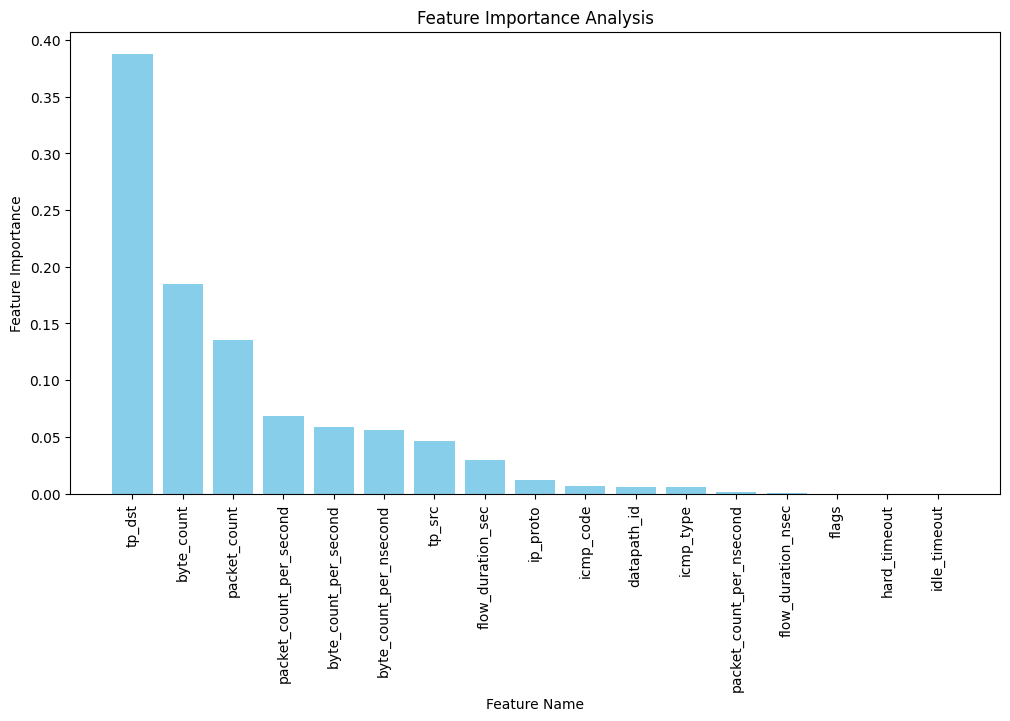

Top 10 Most Important Features:
                    Feature  Importance
2                    tp_dst    0.387984
12               byte_count    0.184434
11             packet_count    0.135030
13  packet_count_per_second    0.068327
15    byte_count_per_second    0.059039
16   byte_count_per_nsecond    0.055764
1                    tp_src    0.046682
6         flow_duration_sec    0.029926
3                  ip_proto    0.012229
4                 icmp_code    0.006789


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'clf_imbalanced' is the trained model on the full (imbalanced) dataset

# Step 1: Extract feature importance
feature_importances = clf_imbalanced.feature_importances_

# Step 2: Map feature importance to feature names
features = X.columns  # Replace X with your dataset's feature matrix
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Plot the top features
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel("Feature Importance")
plt.xlabel("Feature Name")
plt.title("Feature Importance Analysis")
plt.show()

# Step 4: Display the top 10 features
print("Top 10 Most Important Features:")
print(importance_df.head(10))


In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Add noise to the features
def add_noise(data, noise_factor=0.1):
    noisy_data = data.copy()
    for column in noisy_data.columns:
        if noisy_data[column].dtype != 'object':  # Only apply to numerical columns
            noise = np.random.normal(0, noise_factor * noisy_data[column].std(), noisy_data[column].shape)
            noisy_data[column] += noise
    return noisy_data

# Add noise to balanced and imbalanced datasets
noise_factor = 0.1  # Adjust the noise level
X_train_balanced_noisy = add_noise(X_train_balanced, noise_factor)
X_test_balanced_noisy = add_noise(X_test_balanced, noise_factor)

X_train_full_noisy = add_noise(X_train_full, noise_factor)
X_test_full_noisy = add_noise(X_test_full, noise_factor)

# Step 2: Retrain the models with noisy data
clf_balanced_noisy = RandomForestClassifier(random_state=42)
clf_imbalanced_noisy = RandomForestClassifier(random_state=42)

clf_balanced_noisy.fit(X_train_balanced_noisy, y_train_balanced)
clf_imbalanced_noisy.fit(X_train_full_noisy, y_train_full)

# Step 3: Evaluate the noisy models
y_pred_balanced_noisy = clf_balanced_noisy.predict(X_test_balanced_noisy)
y_pred_imbalanced_noisy = clf_imbalanced_noisy.predict(X_test_full_noisy)

# Balanced Results
print("Balanced Data with Noise:")
print("Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced_noisy))
print(classification_report(y_test_balanced, y_pred_balanced_noisy))

# Imbalanced Results
print("Imbalanced Data with Noise:")
print("Accuracy:", accuracy_score(y_test_full, y_pred_imbalanced_noisy))
print(classification_report(y_test_full, y_pred_imbalanced_noisy))


Balanced Data with Noise:
Accuracy: 0.9943657162369814
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2856
           1       0.99      1.00      0.99      3001

    accuracy                           0.99      5857
   macro avg       0.99      0.99      0.99      5857
weighted avg       0.99      0.99      0.99      5857

Imbalanced Data with Noise:
Accuracy: 0.9993236170384089
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2831
           1       1.00      1.00      1.00     59264

    accuracy                           1.00     62095
   macro avg       1.00      0.99      1.00     62095
weighted avg       1.00      1.00      1.00     62095



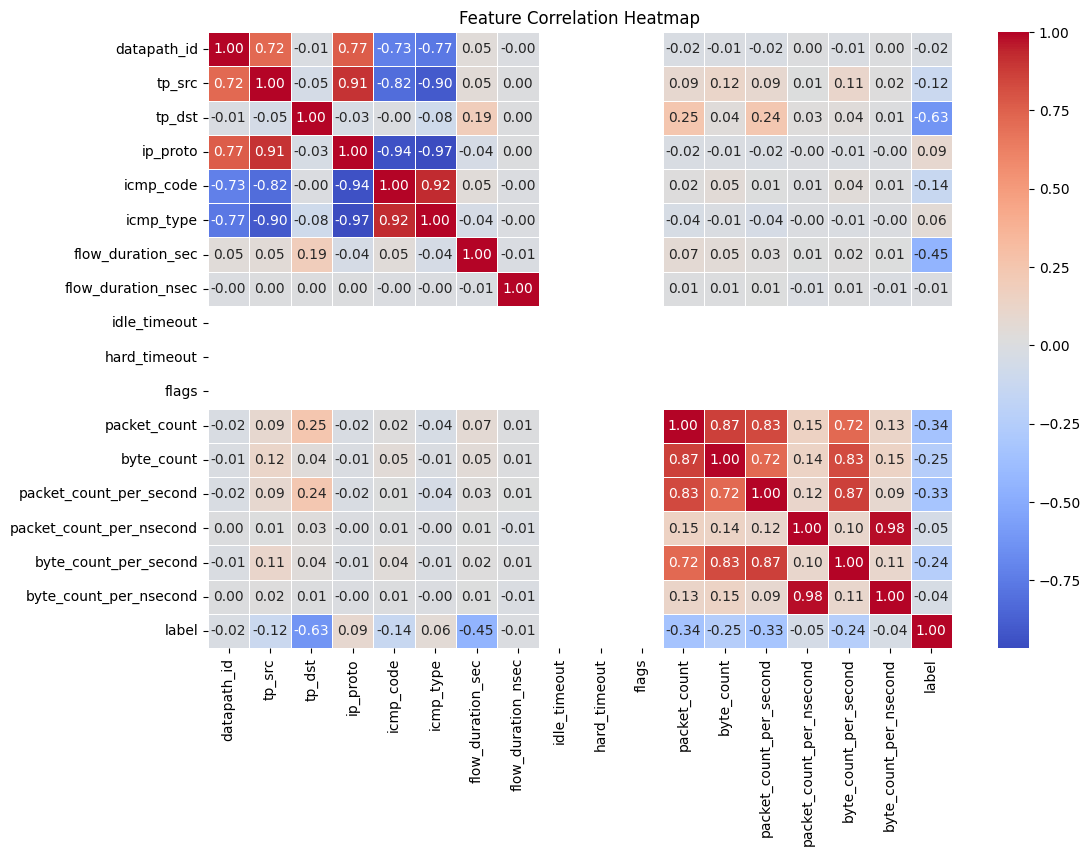

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
correlation_matrix = df_numerical.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


# Prepare data (assuming df_numerical is already defined)
X = df_numerical.drop('label', axis=1)
y = df_numerical['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=2)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate Accuracy and F1 Score
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')  # Use 'weighted' for multiclass

print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, F1 Score: {lr_f1:.4f}")


Logistic Regression - Accuracy: 0.9575, F1 Score: 0.9394


C:\Users\21692\anaconda3\envs\Atelier_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=1,min_weight_fraction_leaf=0.0015)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate Accuracy and F1 Score
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')  # 'weighted' for multiclass

print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, F1 Score: {rf_f1:.4f}")


Random Forest - Accuracy: 0.9945, F1 Score: 0.9944


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=1,min_samples_split=2,min_samples_leaf=10)  # max_depth=1 pour un arbre simple
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate Accuracy and F1 Score
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')  # 'weighted' pour le multi-classes

print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, F1 Score: {dt_f1:.4f}")


Decision Tree - Accuracy: 0.9905, F1 Score: 0.9899


In [34]:
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=1, random_state=500, max_depth=1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')  # Weighted for multiclass

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - F1 Score: {f1_xgb:.4f}")


XGBoost - Accuracy: 0.9905
XGBoost - F1 Score: 0.9899


In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

# Train Naive Bayes Model
nb_model = GaussianNB(var_smoothing=1e-1)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')  # Weighted for multiclass classification

print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes - F1 Score: {f1_nb:.4f}")


Naive Bayes - Accuracy: 0.9575
Naive Bayes - F1 Score: 0.9393


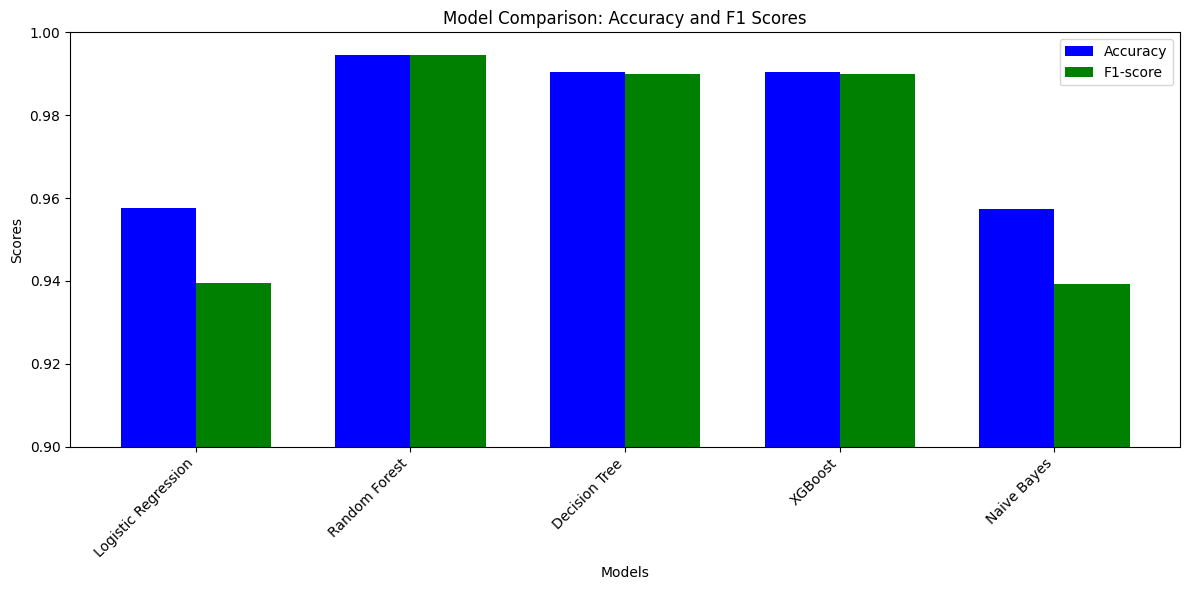

In [83]:
import matplotlib.pyplot as plt

# Collect the results for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'Naive Bayes']
accuracy_scores = [lr_accuracy, rf_accuracy, dt_accuracy, accuracy_xgb, accuracy_nb]
f1_scores = [lr_f1, rf_f1, dt_f1, f1_xgb, f1_nb]

# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 6))
index = range(len(models))
bar_width = 0.35

# Plotting accuracy scores
ax.bar(index, accuracy_scores, bar_width, label='Accuracy', color='b')

# Plotting F1 scores
ax.bar([i + bar_width for i in index], f1_scores, bar_width, label='F1-score', color='g')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy and F1 Scores')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Adjust y-axis to be from 0.9 to 1
ax.set_ylim(0.9, 1)

# Save the plot
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()


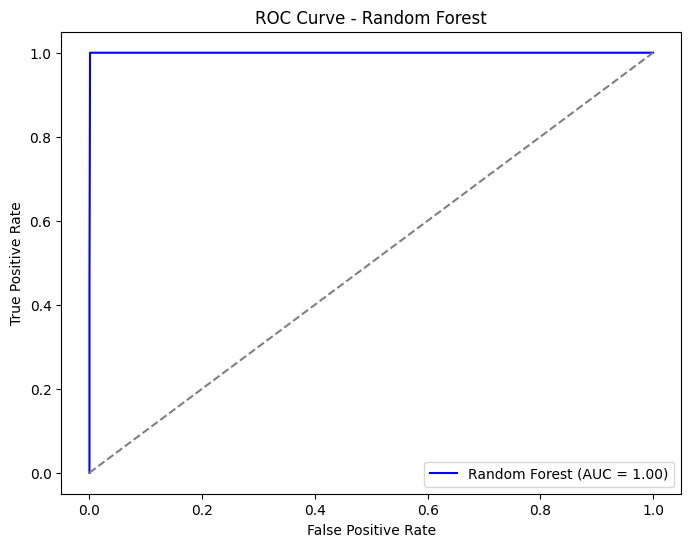

In [40]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


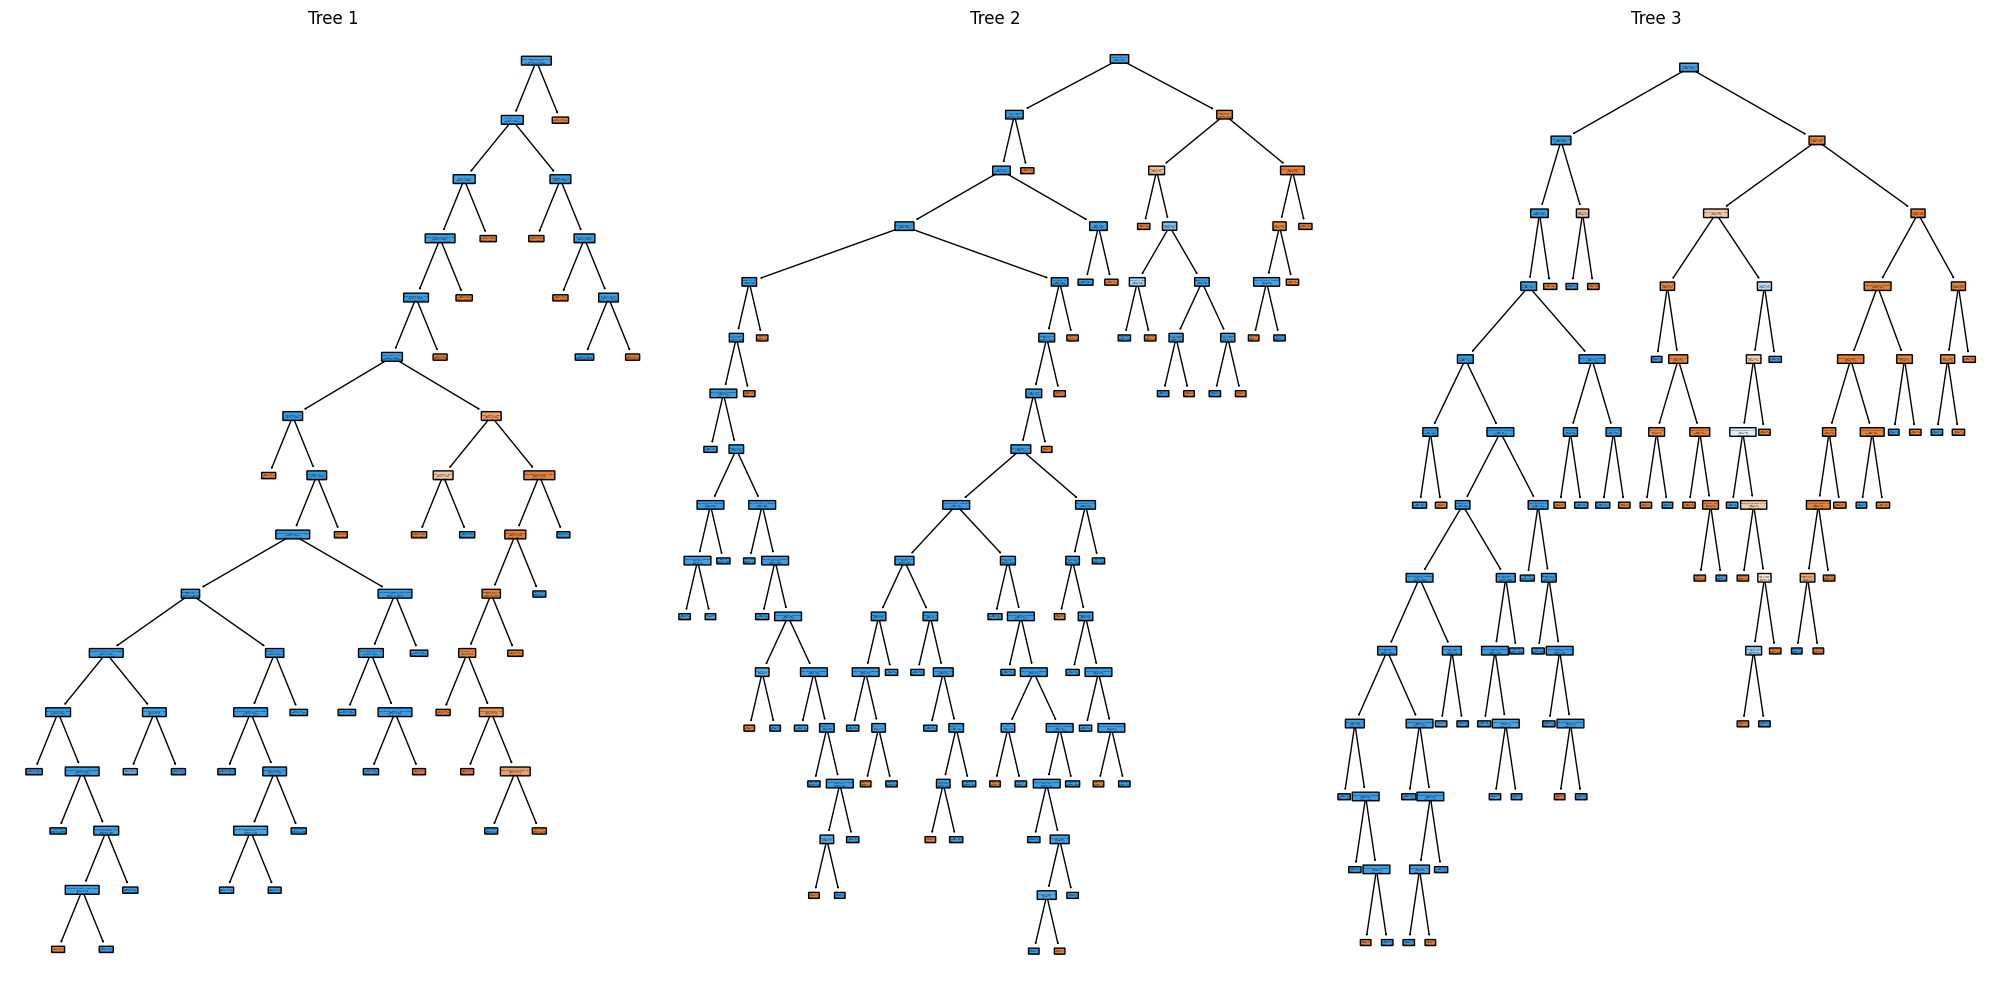

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the number of trees you want to visualize
num_trees_to_plot = 3  # Adjust the number of trees to plot
plt.figure(figsize=(20, 10))

# Create subplots for each tree in the random forest
for i in range(num_trees_to_plot):
    plt.subplot(1, num_trees_to_plot, i+1)  # Create a subplot grid with 1 row and 'num_trees_to_plot' columns
    plot_tree(rf_model.estimators_[i], filled=True, feature_names=X.columns,
              class_names=['0', '1'], rounded=True)
    plt.title(f'Tree {i+1}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


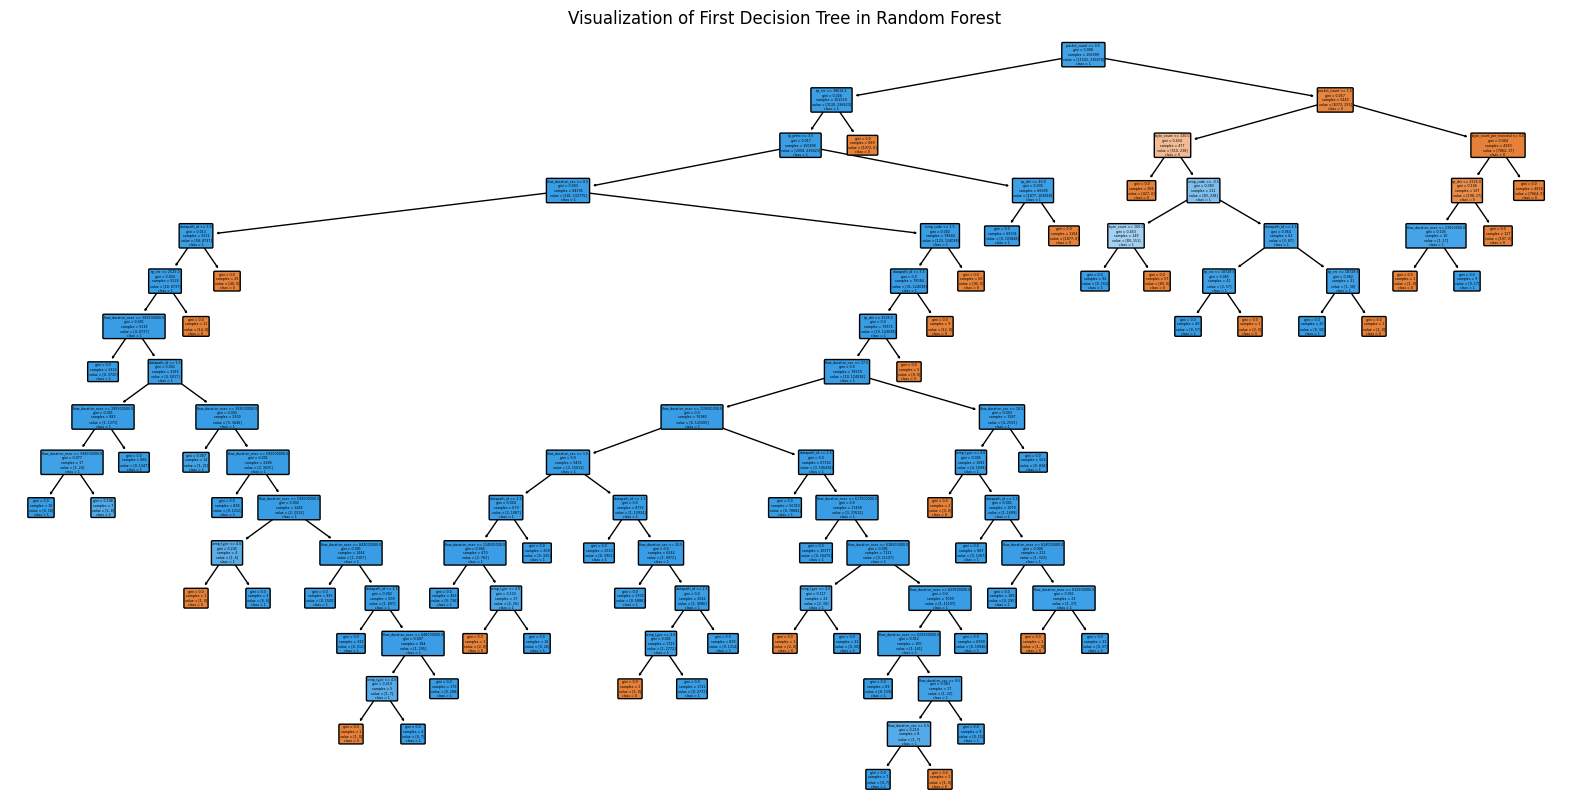

In [45]:
from sklearn.tree import plot_tree

# Plot the first decision tree in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[1], filled=True, feature_names=X.columns, 
          class_names=['0', '1'], rounded=True)
plt.title('Visualization of First Decision Tree in Random Forest')
plt.show()


In [23]:
df['label'].value_counts()

label
1    296191
0     14284
Name: count, dtype: int64

In [12]:
df['packet_count'].value_counts()


packet_count
0         299712
1            946
2            879
894          567
895          142
           ...  
341274         1
22917          1
430532         1
220622         1
451002         1
Name: count, Length: 669, dtype: int64

In [28]:
data1 = pd.read_csv('ddosdata.csv')
data1.head()


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [9]:
data1['Label'].unique()

array(['Benign', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'], dtype=object)

In [10]:
label_counts = data1['Label'].value_counts()
print(label_counts)

Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64


In [29]:
data1['Label'] = data1['Label'].replace(to_replace=r'.*DDOS.*', value='DDOS', regex=True)

# Verify the changes
print(data1['Label'].value_counts())

Label
DDOS      687742
Benign    360833
Name: count, dtype: int64


In [62]:
# Filter the rows labeled 'Benign' in `data`
benign_data = data[data['Label'] == 'Benign']

# Concatenate the filtered `benign_data` with `data1`
data1_balanced = pd.concat([data1, benign_data], ignore_index=True)

print(data1_balanced['Label'].value_counts())


Label
DDOS      687742
Benign    360833
Name: count, dtype: int64


In [63]:
data=data1_balanced
data.head()


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [64]:
# Preprocess the dataset
X = data.drop(['Label'], axis=1)  # Features (e.g., packet count, byte count)
y = data['Label'].apply(lambda x: 1 if x == 'DDOS' else 0) 
print(y.unique())

[0 1]


In [14]:
X.shape

(1495347, 79)

In [65]:
# Define the list of desired features
selected_features = [
    'Dst Port',
    'Init Fwd Win Byts',
    'Init Bwd Win Byts',
    'Fwd Header Len',
    'Pkt Len Max',
    'Bwd Pkt Len Max',
    'Fwd Pkt Len Mean',
    'Bwd Seg Size Avg',
    'Fwd Seg Size Avg',
    'Subflow Bwd Pkts',
    'Fwd Pkt Len Min',
    'Flow Duration'
]

# Filter the DataFrame to keep only the desired columns
X_filtered = X[selected_features]

# Display the first few rows to verify
X_filtered.head()

,Dst Port,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Header Len,Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Seg Size Avg,Fwd Seg Size Avg,Subflow Bwd Pkts,Fwd Pkt Len Min,Flow Duration
0,80,29200,219,168,135,127,27.0,42.333333,27.0,3,0,37953
1,500,-1,-1,24,500,0,500.0,0.000000,500.0,0,500,117573474
2,500,-1,-1,24,500,0,500.0,0.000000,500.0,0,500,117573474
3,500,-1,-1,40,500,0,500.0,0.000000,500.0,0,500,99743998
4,500,-1,-1,40,500,0,500.0,0.000000,500.0,0,500,99743999


In [66]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [67]:

# Convert the scaled NumPy array back to a DataFrame for easy viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X_filtered.columns)

# Display the first 5 rows
X_scaled_df.head()

,Dst Port,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Header Len,Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Seg Size Avg,Fwd Seg Size Avg,Subflow Bwd Pkts,Fwd Pkt Len Min,Flow Duration
0,-0.717368,-1.187034,-0.710011,-0.037118,-0.708375,-0.373778,-0.620028,-0.490306,-0.620028,1.144112,-0.028397,-0.054460
1,-0.701923,-2.941951,-0.724186,-0.040792,0.072651,-0.764193,4.937397,-0.947109,4.937397,-0.886451,55.662668,17.672479
2,-0.701923,-2.941951,-0.724186,-0.040792,0.072651,-0.764193,4.937397,-0.947109,4.937397,-0.886451,55.662668,17.672479
3,-0.701923,-2.941951,-0.724186,-0.040384,0.072651,-0.764193,4.937397,-0.947109,4.937397,-0.886451,55.662668,14.983402
4,-0.701923,-2.941951,-0.724186,-0.040384,0.072651,-0.764193,4.937397,-0.947109,4.937397,-0.886451,55.662668,14.983402


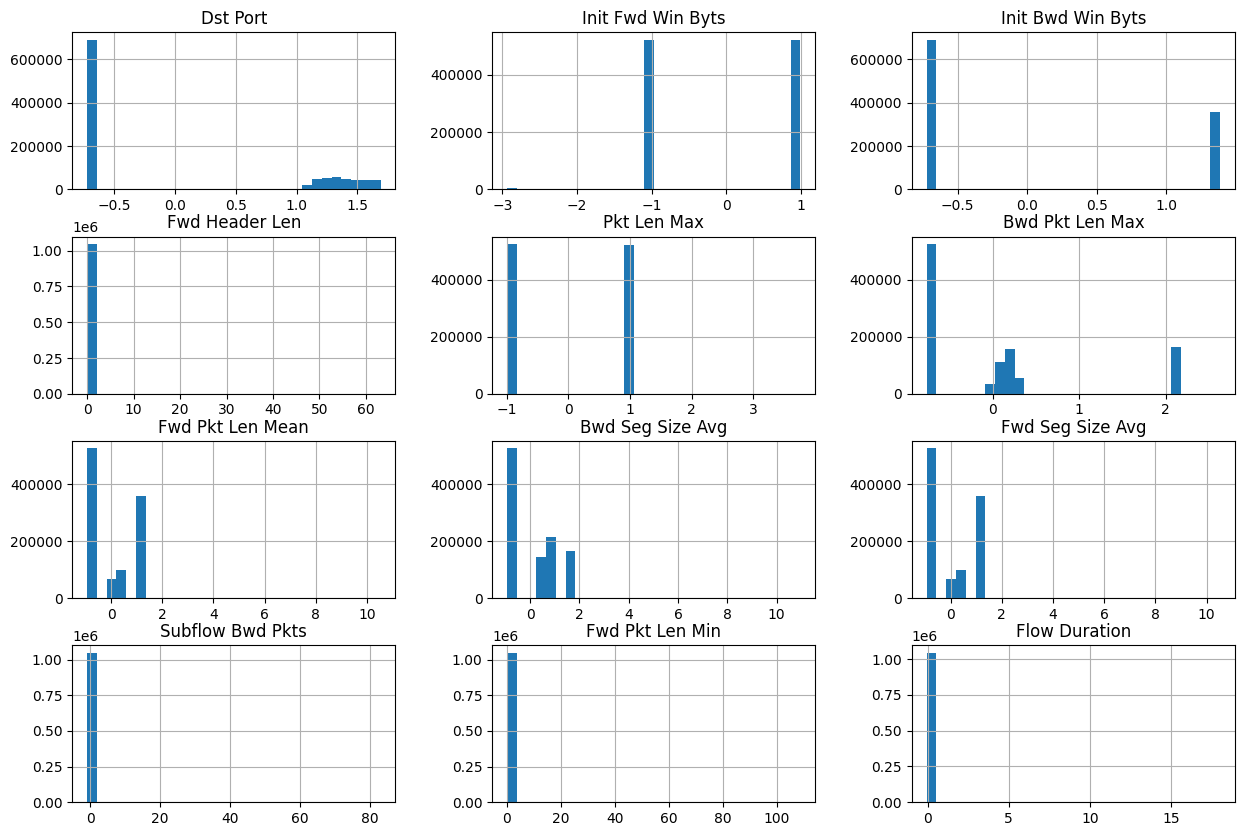

In [68]:
import matplotlib.pyplot as plt

X_scaled_df.hist(bins=30, figsize=(15, 10))
plt.show()

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [70]:
# Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [71]:
# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Default kernel is 'rbf'

# Fit the model
svm_model.fit(X_train_scaled, y_train)


SVC()

In [72]:
# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 72165      2]
 [     0 137548]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      1.00      1.00    137548

    accuracy                           1.00    209715
   macro avg       1.00      1.00      1.00    209715
weighted avg       1.00      1.00      1.00    209715



In [20]:
# Predict on the training set
y_train_pred = svm_model.predict(X_train_scaled)

# Evaluate performance on training data
from sklearn.metrics import classification_report, accuracy_score

print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(classification_report(y_train, y_train_pred))


Training Set Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    646084
           1       1.00      1.00      1.00    550193

    accuracy                           1.00   1196277
   macro avg       1.00      1.00      1.00   1196277
weighted avg       1.00      1.00      1.00   1196277



In [21]:
# Predict on the testing set
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate performance on testing data
print("Testing Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(classification_report(y_test, y_test_pred))


Testing Set Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161521
           1       1.00      1.00      1.00    137549

    accuracy                           1.00    299070
   macro avg       1.00      1.00      1.00    299070
weighted avg       1.00      1.00      1.00    299070



In [22]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.99998328 0.99999582 0.99999164 0.99999582 0.99999164]
Mean CV Accuracy: 1.0000


In [ ]:
"KNN LEEE 5ATER AANA BARCHA DATA W YA5OTH BARCHAAAAAAAAAAAAAA WA9T"

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [27]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Start with 5 neighbors

# Train the model
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [28]:
y_test_pred_knn = knn_model.predict(X_test_scaled)


KeyboardInterrupt: 

In [ ]:
# Confusion Matrix
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred_knn))

# Classification Report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_knn))

# Accuracy Score
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Test Set Accuracy: {test_accuracy_knn:.4f}")


In [29]:

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict
y_test_pred_log = log_reg.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_test_pred_log))

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_log))

print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred_log):.4f}")


Confusion Matrix (Logistic Regression):
[[161508     13]
 [     0 137549]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161521
           1       1.00      1.00      1.00    137549

    accuracy                           1.00    299070
   macro avg       1.00      1.00      1.00    299070
weighted avg       1.00      1.00      1.00    299070

Test Set Accuracy: 1.0000


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use all processors

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_test_pred_rf))

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")


Confusion Matrix (Random Forest):
[[161521      0]
 [     0 137549]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161521
           1       1.00      1.00      1.00    137549

    accuracy                           1.00    299070
   macro avg       1.00      1.00      1.00    299070
weighted avg       1.00      1.00      1.00    299070

Test Set Accuracy: 1.0000


In [31]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_test_pred_xgb))

print("Classification Report (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))

print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")


Confusion Matrix (XGBoost):
[[161516      5]
 [     0 137549]]
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161521
           1       1.00      1.00      1.00    137549

    accuracy                           1.00    299070
   macro avg       1.00      1.00      1.00    299070
weighted avg       1.00      1.00      1.00    299070

Test Set Accuracy: 1.0000


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, y_test_pred_nb))

print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_test_pred_nb))

print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred_nb):.4f}")


Confusion Matrix (Naive Bayes):
[[161515      6]
 [     0 137549]]
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161521
           1       1.00      1.00      1.00    137549

    accuracy                           1.00    299070
   macro avg       1.00      1.00      1.00    299070
weighted avg       1.00      1.00      1.00    299070

Test Set Accuracy: 1.0000
